In [1]:
# Import libs
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import matplotlib.pyplot as plt

In [2]:
# Define directories
train_dir = '/Users/tharindu/Downloads/cat-vs-dogs-kaggle/train/'
test_dir = '/Users/tharindu/Downloads/cat-vs-dogs-kaggle/test/'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_cross entropy loss, we need binary labels
    class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
# Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Metal device set to: Apple M1 Pro


2023-06-04 09:28:02.832910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-04 09:28:02.833311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [4]:
model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
start_time = time.time()
print(f'\nMODEL TRAINING:')
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1
)
print(f"DNN training time: {time.time() - start_time} seconds")


MODEL TRAINING:
Epoch 1/15


2023-06-04 09:28:38.285166: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-04 09:28:38.616214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1199/1200 [============================>.] - ETA: 0s - loss: 0.5866 - accuracy: 0.6959

2023-06-04 09:29:20.251229: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-04 09:29:20.315115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1200/1200 [==============================] - 44s 36ms/step - loss: 0.5864 - accuracy: 0.6960 - val_loss: 0.5165 - val_accuracy: 0.7600
Epoch 2/15
1200/1200 [==============================] - 43s 36ms/step - loss: 0.4638 - accuracy: 0.7845 - val_loss: 0.4717 - val_accuracy: 0.7730
Epoch 3/15
1200/1200 [==============================] - 41s 34ms/step - loss: 0.4101 - accuracy: 0.8200 - val_loss: 0.5655 - val_accuracy: 0.7680
Epoch 4/15
1200/1200 [==============================] - 41s 34ms/step - loss: 0.3758 - accuracy: 0.8378 - val_loss: 0.3975 - val_accuracy: 0.8290
Epoch 5/15
1200/1200 [==============================] - 41s 34ms/step - loss: 0.3517 - accuracy: 0.8534 - val_loss: 0.3673 - val_accuracy: 0.8490
Epoch 6/15
1200/1200 [==============================] - 42s 35ms/step - loss: 0.3292 - accuracy: 0.8673 - val_loss: 0.3687 - val_accuracy: 0.8530
Epoch 7/15
1200/1200 [==============================] - 42s 35ms/step - loss: 0.3092 - accuracy: 0.8716 - val_loss: 0.4014 - val_accura

In [7]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

 5/50 [==>...........................] - ETA: 1s - loss: 1.1777 - accuracy: 0.8200

2023-06-04 09:39:06.101973: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 1s 29ms/step - loss: 1.0263 - accuracy: 0.8270
Validation Loss: 1.026259183883667
Validation Accuracy: 0.8270000219345093


In [8]:
# Save Model
model.save('/Users/tharindu/Downloads/cat-vs-dogs-kaggle/cat-dog-model.keras', save_format='tf')

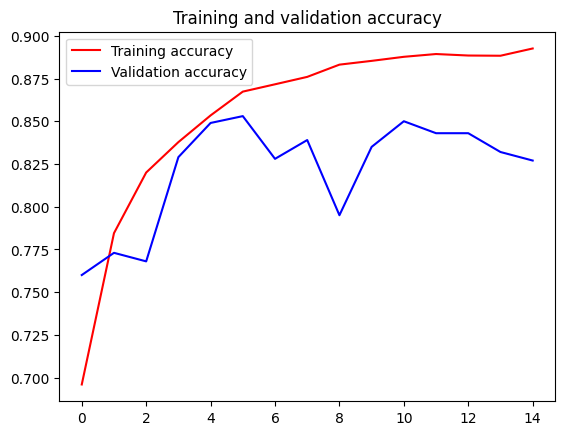

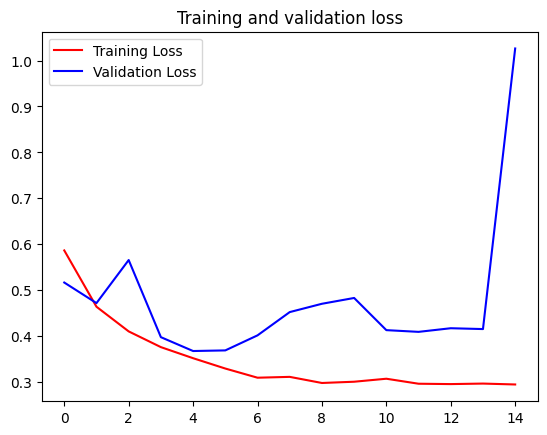

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
